In [ ]:
# Import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
import seaborn as sns

In [ ]:
# Read Data
df_employee = pd.read_csv('https://bit.ly/2ODZvLCHRDataset')

df_glossary = pd.read_csv('https://bit.ly/2Wz3sWcGlossary')

# Preview records
df_employee.head(5)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
df_glossary.head(5)

,employee_id - Unique ID for employee
0,department - Department of employee
1,region - Region of employment (unordered)
2,education - Education Level
3,gender - Gender of Employee
4,recruitment_channel - Channel of recruitment f...


In [ ]:
# Determine Dataset size
df_employee.shape

(54808, 14)

In [ ]:
df_glossary.shape

(13, 1)

Data Clean-Up

In [ ]:
df_employee.isna().sum()
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


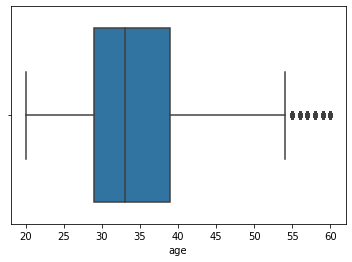

In [ ]:
sns.boxplot(df_employee.age)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


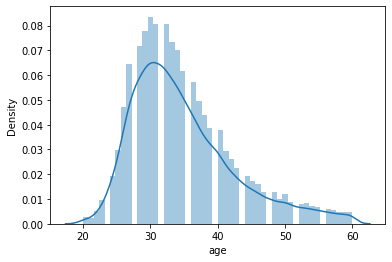

In [ ]:
sns.distplot(df_employee.age)
#Highly right skewed 

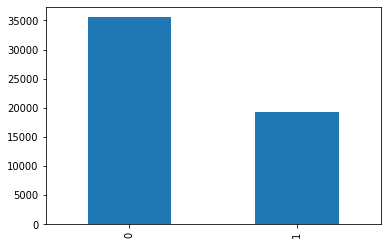

In [ ]:
# KPI Analysis, those who met
df_employee["KPIs_met >80%"].value_counts().plot(kind="bar")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


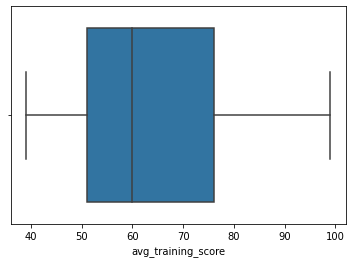

In [ ]:
sns.boxplot(df_employee["avg_training_score"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


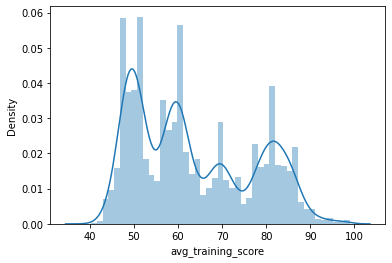

In [ ]:
sns.distplot(df_employee["avg_training_score"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


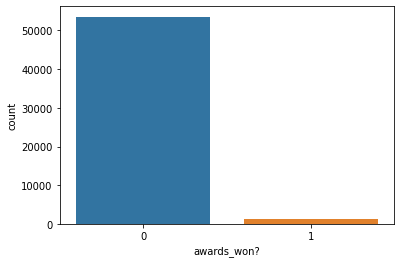

In [ ]:
# Awards Wone
sns.countplot(df_employee["awards_won?"])

In [ ]:
# Awards vs Promo Vs Age
df_employee[(df_employee["awards_won?"]==1) & (df_employee["is_promoted"]==1.0)]["age"]

66       27
122      37
200      34
230      38
317      40
         ..
54017    41
54024    60
54146    37
54503    32
54507    35
Name: age, Length: 559, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


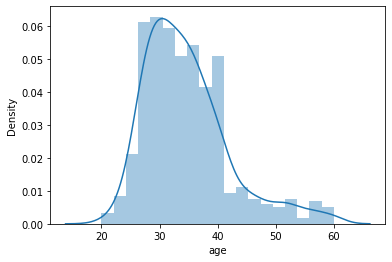

In [ ]:
sns.distplot(df_employee[(df_employee["awards_won?"]==1) & (df_employee["is_promoted"]==1.0)]["age"])

In [ ]:
df_employee[(df_employee["awards_won?"]==1) & (df_employee["is_promoted"]==0.0)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
138,51164,Technology,region_14,Bachelor's,f,other,1,31,4.0,4,1,1,78,0
140,7606,Technology,region_29,Bachelor's,f,other,2,30,3.0,7,1,1,76,0
208,18981,Legal,region_2,Master's & above,m,sourcing,1,50,5.0,6,0,1,58,0
239,9563,Operations,region_31,Bachelor's,m,other,2,38,3.0,7,1,1,60,0
250,40376,Sales & Marketing,region_4,Bachelor's,m,other,1,30,5.0,4,0,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54641,2467,Sales & Marketing,region_27,Bachelor's,m,other,1,42,2.0,4,0,1,47,0
54702,4952,Operations,region_28,Bachelor's,m,other,1,28,3.0,2,0,1,62,0
54772,34501,Operations,region_27,Master's & above,m,other,1,37,5.0,2,1,1,57,0
54797,62450,Sales & Marketing,region_11,Bachelor's,m,sourcing,1,28,5.0,3,1,1,47,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


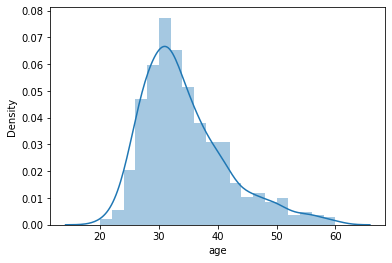

In [ ]:
sns.distplot(df_employee[(df_employee["awards_won?"]==1) & (df_employee["is_promoted"]==0.0)]["age"])

In [ ]:
df_employee[(df_employee["awards_won?"]==0) & (df_employee["is_promoted"]==1.0)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1
69,45624,Analytics,region_31,Bachelor's,m,other,1,30,3.0,7,1,0,84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54757,14502,Technology,region_7,Master's & above,m,other,1,54,4.0,7,0,0,81,1
54761,8278,Procurement,region_13,Bachelor's,f,sourcing,1,30,4.0,2,1,0,86,1
54792,994,Sales & Marketing,region_14,Bachelor's,m,other,1,59,3.0,11,0,0,65,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: ignored

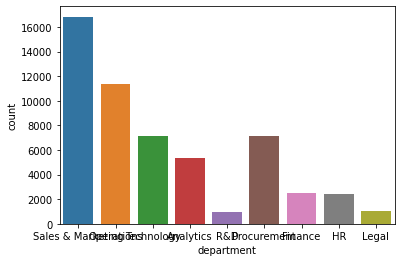

In [ ]:
sns.countplot(df_employee.department)
plt.xticks(rotation=90)